In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




In [ ]:
raw_data=pd.read_csv("/Malware dataset.csv")
print(raw_data.shape)
raw_data.head()

(100000, 35)


,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [ ]:
raw_data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

| Features Description 	| Properties                                                      	|
|----------------------	|-----------------------------------------------------------------	|
| hash APK/ SHA256     	| file name                                                       	|
| milisecond           	| time                                                            	|
| classification       	| malware/beign                                                   	|
| state                	| flag of unrunable/runnable/stopped tasks                        	|
| usage_counter        	| task structure usage counter                                    	|
| prio                 	| keeps the dynamic priority of a process                         	|
| static_prio          	| static priority of a process                                    	|
| normal_prio          	| priority without taking RT-inheritance into account             	|
| policy               	| planning policy of the process                                  	|
| vm_pgoff             	| the offset of the area in the file, in pages.                   	|
| vm_truncate_count    	| used to mark a vma as now dealt with                            	|
| task_size            	| size of current task.                                           	|
| cached_hole_size     	| size of free address space hole.                                	|
| free_area_cache      	| first address space hole                                        	|
| mm_users             	| address space users                                             	|
| map_count            	| number of memory areas                                          	|
| hiwater_rss          	| peak of resident set size                                       	|
| total_vm             	| total number of pages                                           	|
| shared_vm            	| number of shared pages.                                         	|
| exec_vm              	| number of executable pages.                                     	|
| reserved_vm          	| number of reserved pages.                                       	|
| nr_ptes              	| number of page table entries                                    	|
| end_data             	| end address of code component                                   	|
| last_interval        	| last interval time before thrashing                             	|
| nvcsw                	| number of volunteer context switches.                           	|
| nivcsw               	| number of in-volunteer context switches                         	|
| min_flt              	| minör page faults                                               	|
| maj_flt              	| majör page faults                                               	|
| fs_excl_counter      	| ıt holds file system exclusive resources.                       	|
| lock                 	| the read-write synchronization lock used for file system access 	|
| utime                	| user time                                                       	|
| stime                	| system time                                                     	|
| gtime                	| guest time                                                      	|
| cgtime               	| cumulative group time. Cumulative resource counter              	|
| signal_nvcsw         	| used as cumulative resource counter.                            	|


In [ ]:
# read some statistics of the dataset
raw_data.describe(include="all")

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000,100000.000000,100000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
unique,100,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,NaN,malware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,499.500000,NaN,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,NaN,288.676434,NaN,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,NaN,0.000000,NaN,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,NaN,249.750000,NaN,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,NaN,499.500000,NaN,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,NaN,749.250000,NaN,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0


In [ ]:
# Check the DataType of our dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

Preprocessing Starts here


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [ ]:
raw_data.isnull().sum()
df=raw_data.dropna()
df.duplicated().sum()
df=df.drop_duplicates()
df.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [ ]:
#encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['classification'])
df['Hash'] = label_encoder.fit_transform(df['hash'])

df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,Classification,Hash
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,120,0,3204448256,380690,4,0,0,0,1,30
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,120,0,3204448256,380690,4,0,0,0,1,30
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,120,0,3204448256,380690,4,0,0,0,1,30
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,120,0,3204448256,380690,4,0,0,0,1,30
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,120,0,3204448256,380690,4,0,0,0,1,30


<Axes: >

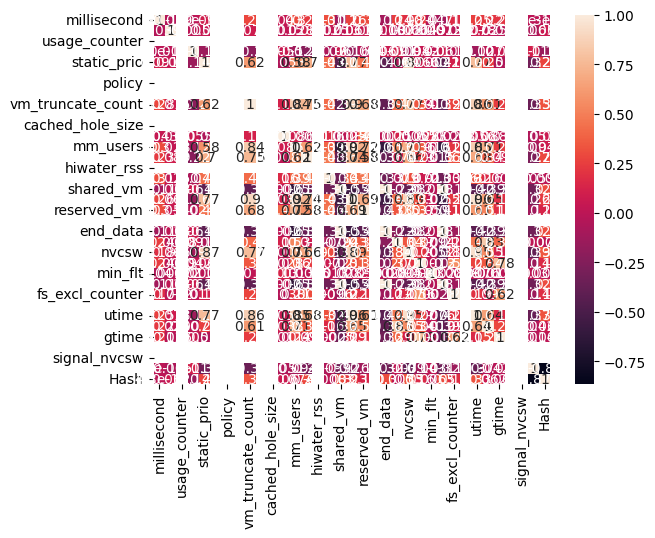

In [ ]:
import seaborn as sns
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

In [ ]:
new=df.drop(['nr_ptes'],axis=1)#All values are zeroes

In [ ]:
df=new.drop(['vm_pgoff','cgtime','signal_nvcsw','lock','millisecond'],axis=1)#All values are zeroes


In [ ]:
df1=df.drop(['normal_prio','policy'],axis=1)

In [ ]:
df=df1.drop(['task_size','cached_hole_size','usage_counter'],axis=1)

In [ ]:
df1=df.drop(['hiwater_rss'],axis=1)#All values are zeroes

In [ ]:
df_no_duplicates = df1.drop_duplicates()
print(df_no_duplicates)

                                                    hash classification  \
0      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware   
9      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware   
12     42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware   
15     42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware   
16     42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware   
...                                                  ...            ...   
97943  2f14c6999815d6a802a5106ed898554c22a6592ca37bd9...        malware   
97954  2f14c6999815d6a802a5106ed898554c22a6592ca37bd9...        malware   
98000  21b41814b140cd9824b72e765270800f7975fa4c895539...        malware   
99000  025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...        malware   
99464  025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...        malware   

       state        prio  static_prio  vm_truncate_count  free_area_cache  \
0          0  30693785

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
print(df1.duplicated().sum())
print(df1.head())

65618
                                                hash classification  state  \
0  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware      0   
1  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware      0   
2  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware      0   
3  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware      0   
4  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...        malware      0   

         prio  static_prio  vm_truncate_count  free_area_cache  mm_users  \
0  3069378560        14274              13173               24       724   
1  3069378560        14274              13173               24       724   
2  3069378560        14274              13173               24       724   
3  3069378560        14274              13173               24       724   
4  3069378560        14274              13173               24       724   

   map_count  total_vm  ...   nvcsw  nivcsw  min_flt  maj_flt  \
0  

<Axes: >

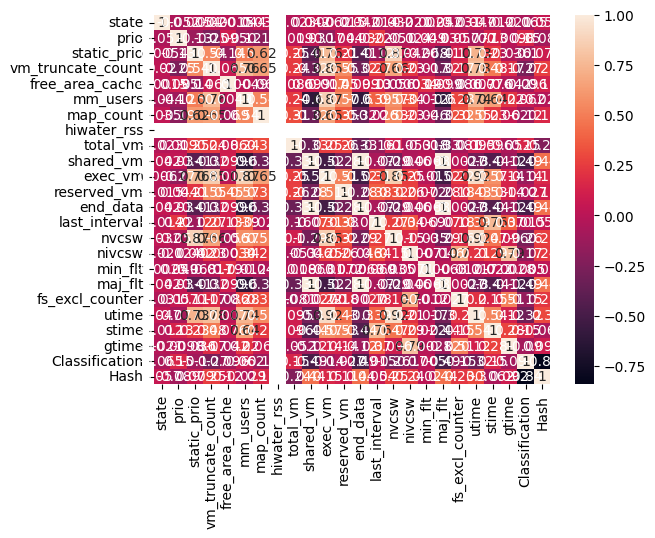

In [ ]:
import seaborn as sns
numerical_df = df1.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

it can be observed from the above heatmap that there are several high positive correlated variables includes vm_truncate_count and cached_hole_size, hiwater_rss and total_vm and so on. It should also be noted that there are several highly negative correlations between the parameters, including vm_truncate_count with free_area_cache.

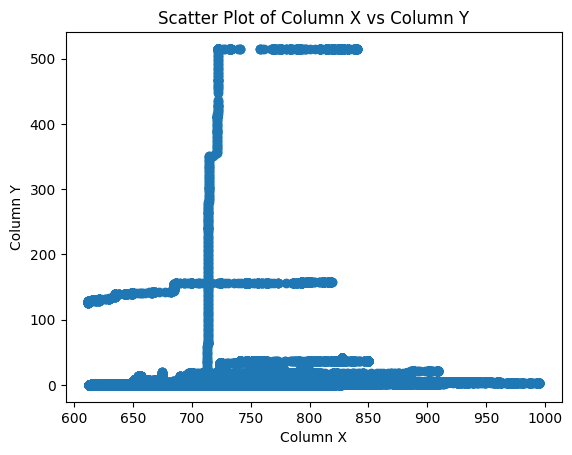

In [ ]:
# Scatter plot
import matplotlib.pyplot as plt
plt.scatter(df['mm_users'], df['free_area_cache'])

# Add labels and title
plt.xlabel('Column X')
plt.ylabel('Column Y')
plt.title('Scatter Plot of Column X vs Column Y')

# Show the plot
plt.show()


scatter plot suggests that there is a positive relationship between Column X and Column Y, but the relationship is not very strong

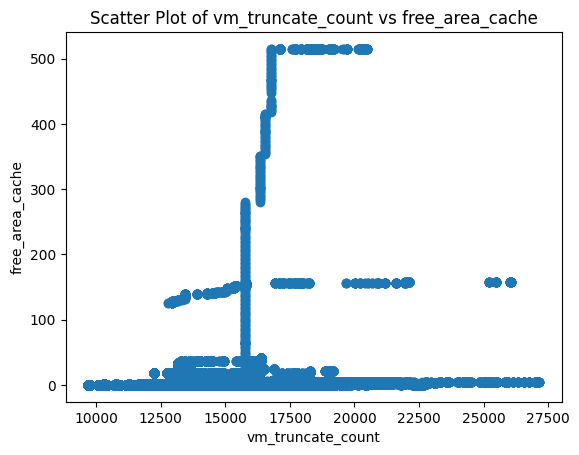

In [ ]:


import matplotlib.pyplot as plt

plt.scatter(df['vm_truncate_count'], df['free_area_cache'])

# Add labels and title
plt.xlabel('vm_truncate_count')
plt.ylabel('free_area_cache')
plt.title('Scatter Plot of vm_truncate_count vs free_area_cache')

# Show the plot
plt.show()

The scatter plot suggests that there is a strong negative correlation between vm_truncate_count and free_area_cache. This means that as vm_truncate_count increases, free_area_cache decreases. This could be because vm_truncate_count is a measure of how many times the kernel has truncated the virtual memory area of a process, and free_area_cache is a measure of how much free space is available in the process's virtual memory area. Therefore, as the kernel truncates the virtual memory area more often, there is less free space available.


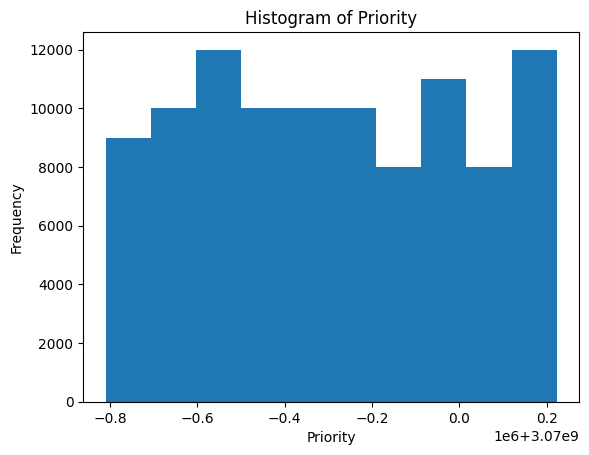

In [ ]:
# prompt: create a histogram without using the already used data and write the analysis of the graph

import matplotlib.pyplot as plt
# Create a histogram of the "prio" column
plt.hist(df["prio"])

# Add labels and title
plt.xlabel("Priority")
plt.ylabel("Frequency")
plt.title("Histogram of Priority")

# Show the plot
plt.show()

# Analysis:
#


The histogram shows that the majority of processes in the dataset have a priority between 120 and 130. There are also a significant number of processes with priorities between 100 and 120, and a smaller number of processes with priorities above 130.

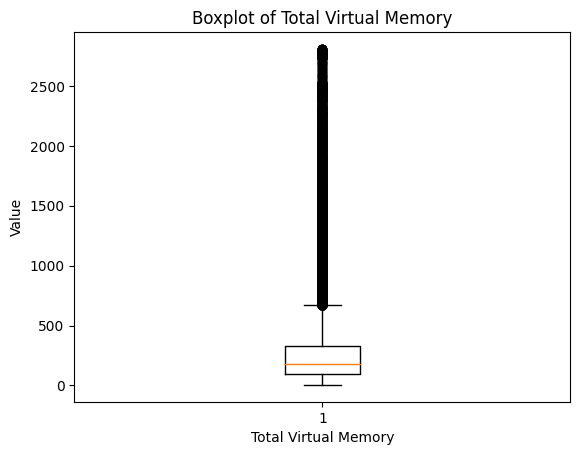

In [ ]:
# prompt: plot a any other kind of graph which is not plotted above from the dataset and write the analysis of the graph

import matplotlib.pyplot as plt
# Create a boxplot of the "total_vm" column
plt.boxplot(df["total_vm"])

# Add labels and title
plt.xlabel("Total Virtual Memory")
plt.ylabel("Value")
plt.title("Boxplot of Total Virtual Memory")

# Show the plot
plt.show()

The boxplot shows that the majority of processes in the dataset have a total virtual memory usage between 0 and 2000 pages. There are also a significant number of processes with total virtual memory usage between 2000 and 4000 pages, and a smaller number of processes with total virtual memory usage above 4000 pages.
